# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [130]:
import pandas as pd

# Загрузка данных, вывод общей информации
data = pd.read_csv('./Advertising.csv', index_col=0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [131]:
print(f'Количество пропусков: {data.isnull().sum().sum()}')

Количество пропусков: 0


> Данные об эффективности размещения рекламы загружены, содержат 200 строк, представлены в числовом виде, пропуски отсутствуют.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [132]:
# Разделение массива данных на переменные с приведением к 'numpy.ndarray'
X_init = data[['TV', 'radio', 'newspaper']].to_numpy()
X = X_init
y = data['sales'].to_numpy()
display(f'Тип данных X: {type(X)}')
display(f'Тип данных y: {type(y)}')

"Тип данных X: <class 'numpy.ndarray'>"

"Тип данных y: <class 'numpy.ndarray'>"

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [133]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [134]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij} w_{j} $$
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [135]:
def coordinate_descent(X=X, y=y, num_iters=1000):
    '''Функция получения весов модели линейной регрессии
       по алгоритму координатного спуска для случая 
       нормализованных данных
       X : ndarray - Матрица признаков.
       y : ndarray - Вектор целевых значений.
       Возвращает
       w : ndarray - Вектор коэффициентов модели'''
    m, n = X.shape
    w = np.zeros(n).reshape(n, 1)

    for i in range(num_iters):
        for k in range(n):
            # Вычисление прогноза без k-ого фактора
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            # Обновление нового значения k-ого коэффициента
            w[k] =  (X[:,k].T @ (y - h))
            # Вычисление функции потерь
            cost = sum(((X @ w) - y) ** 2) / (len(y))
    return w


# Получение весов модели линейной регрессии
w = coordinate_descent()
print('Веса модели линейной регрессии:', *w, sep='\n')

Веса модели линейной регрессии:
[41.56217205]
[110.13144155]
[73.52860638]
[-0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [136]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

> Коэффициенты, полученные при использовании функции, реализованной в задании, совпадают с коэффициентами модели, обученной при использовании реализации линейной регрессии из библиотеки sklearn, что свидетельствует об идентичности реализации.

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [137]:
# Масштабирование столбцов исх.матрицы
X = (X_init - X_init.mean()) / X_init.std()

**Добавим единичный столбец**

In [138]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [139]:
def mse_error(y_true, y_pred):
    '''Функция вычисления среднеквадратичной ошибки
       y_true : ndarray - Вектор реальных значений.
       y_pred : ndarray - Вектор спрогнозированных значений.
       Возвращает
       mse : float - среднеквадратичная ошибка'''
    if (n := len(y_true)) != len(y_pred):
        return None
    mse = np.sum((y_true - y_pred)**2) / n
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [140]:
# Прогнозирование продаж средним значением
y_pred = np.array([y.mean()] * len(y))
print(f'MSE наивного прогноза: {mse_error(y, y_pred):.2f}')

MSE наивного прогноза: 5417.15


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [141]:
def lin_pred(X, w):
    '''Функция получения вектора прогнозов модели линейной регрессии
       X : ndarray - Матрица признаков.
       w : ndarray - Вектор коэффициентов модели.
       Возвращает : ndarray - Вектор спрогнозированных значений'''
    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [142]:
def stoch_grad_step(X, y, w, train_ind, eta):
    '''Функция вычисления шага стохастического градиентного спуска
       X : ndarray - Матрица признаков
       y : ndarray - Вектор целевых значений.
       w : ndarray - Текущий вектор коэффициентов модели.
       train_ind : int - Индекс строки в X и y, которая
       используется в текущем стохастическом обновлении.
       eta : float - Темп обучения.
       Возвращает
       w_new : ndarray - Обновлённый вектор коэффициентов'''
    xi = X[train_ind]
    yi = y[train_ind]
    # Предсказанное значение
    y_pred = lin_pred(xi, w)
    # Ошибка предсказания
    error = y_pred - yi
    direction = (2 * eta) * xi * error
    # Обновление весов
    w_new = w - direction
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте основной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [143]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iters, eps_stop, random_state=None):
    '''Функция стохастического градиентного спуска для линейной регрессии
       X : ndarray - Матрица признаков
       y : ndarray - Вектор целевых значений.
       ww_init : ndarray - Начальный вектор коэффициентов модели.
       eta : float - Темп обучения.
       max_iters : int - Максимальное число итераций алгоритма.
       eps_stop : float - Порог евклидова расстояния между весами на соседних итерациях.
       random_state : int | None - Фиксация результата генератора случайных чисел.
       Возвращает
       w : ndarray - Итоговый вектор весов.
       errors : list of float - Список среднеквадратичных ошибок (MSE) на каждой итерации'''
    # ---------- Инициализация ----------
    # Текущие веса
    w = np.array(w_init, dtype=float)
    # «Бесконечно» далёкие от w
    prev_w = np.full_like(w, np.inf)
    errors = []
    # Счётчик итераций
    it = 0
    # Фиксация результата генератора случайных чисел
    if random_state is not None:
        np.random.seed(random_state)
    # ---------- Основной цикл ----------
    while np.linalg.norm(w - prev_w) > eps_stop and it < max_iters:
        # Сохранение предыдущего состояния для проверки сходимости
        prev_w = w.copy()
        # Получение случайного индекса обучающего примера
        idx = np.random.randint(0, X.shape[0])
        # Вычисление MSE
        y_pred = lin_pred(X, w)
        mse = mse_error(y, y_pred)
        errors.append(mse)
        # Стохастический шаг
        w = stoch_grad_step(X, y, w, idx, eta)
        # Инкремент счётчика
        it += 1
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

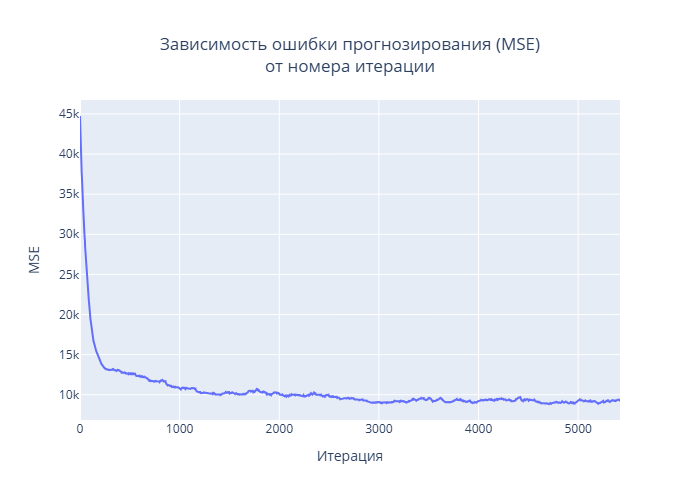

In [144]:
# Инициализация вектора начальных весов нулями
w = np.zeros(4)
# Получение результатов стохастического градиентного спуска
sgd_result = stochastic_gradient_descent(X, y, w, eta=0.001, max_iters=100000, eps_stop=1e-6, random_state=42)

# График зависимости ошибки от номера итерации
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=sgd_result[1],
                         name='MSE'))
fig.update_layout(autosize = False, width = 1000, height = 620, # Размер полотна
                             title_text=f'Зависимость ошибки прогнозирования (MSE)<br>от номера итерации',
                             title_x=0.5,
                             xaxis_title='Итерация',
                             yaxis_title='MSE')
fig.show('png')

**Выведите вектор весов, к которому сошелся метод.**

In [145]:
print(*sgd_result[0], sep='\n')

9.85129703202089
3.8894853135137986
0.7826687789672571
-0.6113439981411715


**Выведите среднеквадратичную ошибку на последней итерации.**

In [146]:
print(f'MSE SGD: {sgd_result[1][-1]:.2f}')

MSE SGD: 9202.47


> Реализованная функция стохастического градиентного спуска для линейной регрессии на предоставленных для анализа масштабированных данных показала более высокую среднеквадратичную ошибку, чем "наивный" прогноз средними значениями (при использовании в качестве исходного вектора начальных весов вектора, состоящего из нулей и различных значениях темпа обучения (0.1 - 1e-6)).
Так как количество итераций не превосходит заданное число, то, вероятно, при заданных гиперпараметрах алгоритм попадает в локальный минимум, из которого не может выбраться, при шаге 0.1 алгоритм заканчивает работу по достижению предела количества итераций, но так и не выдает лучшего результата.  
Таким образом модель, полученная с использованием стохастического градиентного спуска, недообучена.